In [27]:
import pandas as pd
df=pd.read_csv('./Wholesale_customers_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [28]:
X=df.iloc[:,:]

In [29]:
X.shape

(440, 8)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) # 데이터는 버리고 규칙만 받고 있음.
X = scaler.transform(X)

In [32]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)

In [33]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.labels_ # x를 fit하고 나서 y를 뽑아낸것임 아래는 y임

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1,

In [36]:
df['label']=kmeans.labels_

In [37]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


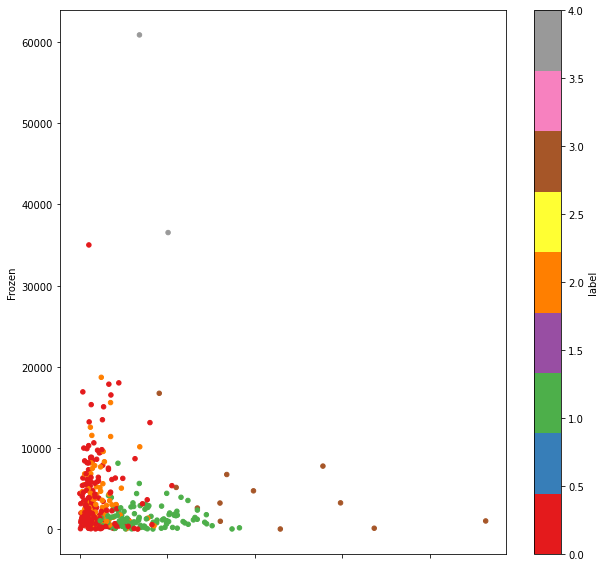

In [41]:
df.plot(kind='scatter',x='Grocery',y='Frozen',c='label',cmap='Set1',figsize=(10,10))

In [43]:
#for ...:
#  if ~((df['label']==0) | (df['label']==4)):
dfx=df[~((df['label']==0) | (df['label']==4))]
df.shape, dfx.shape

((440, 9), (229, 9))

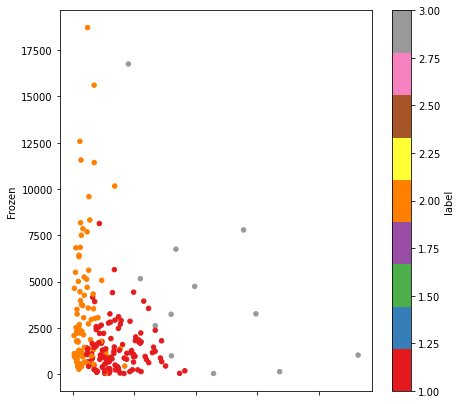

In [44]:
dfx.plot(kind='scatter',x='Grocery',y='Frozen',c='label',cmap='Set1',figsize=(7,7))

In [45]:
df.to_excel('./wholesale.xls')